In [130]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import seaborn as sns
from scipy import stats
%matplotlib inline

In [131]:
painting_paths = ['https://images.saatchiart.com/saatchi/1031479/art/4054974/3124827-TYJTOPGN-7.jpg',
                 'https://lh6.ggpht.com/Qv8q8AeUMvDmsjv8muxWsBnbHBNLCdnlIfxQFZoZ7pigYRdgo9zpU9kZHL3h=s1200',
                 'https://images.curiator.com/image/upload/f_auto,q_auto/t_x/art/xy9xjqqni7zqoli3wqyq.jpg',
                 'https://lh5.ggpht.com/5ffVLF4_h3Oap6xNuv-1YVPq8ENRphGha9XJGJ_HKwFxb1-nucqWVQgtJ8159A=s1200',
                 'https://shop.melissamckinnonart.com/wp-content/uploads/2018/02/Purple-Haze-Melissa-McKinnon-Landscape-Painting-01weblogo.jpg',
                 'https://hollyvanhart.com/wp-content/uploads/abstract-landscape-painting-mixed-media-Finding-Peace-60-x-72-by-Holly-Van-Hart.jpg']


painting_path2= ['https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/lake-sunrise-spacefrog-designs.jpg',
                 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/blue-mountain-reflection-spacefrog-designs.jpg',
                 'https://www.absolutearts.com/portfolio3/y/yougallery/Spelendid_golden_mountain_in_Tibet_060-1502335454m.jpg',
                 'https://pbs.twimg.com/media/CgpvuMUU0AEmfDu.jpg']

In [132]:
#requests, decodes, opens file as array
def image_show(path):
    r = requests.get(path, stream=True)
    r.raw.decode_content
    img = Image.open(r.raw)
    img = np.asarray(img)
    plt.imshow(img)

def image_reader(path):
    r = requests.get(path, stream=True)
    r.raw.decode_content
    img = Image.open(r.raw)
    img = np.asarray(img)
    return img

from scipy.misc import imsave

In [133]:
#saves image from internet
def image_saver(url, name): 
    
    r = requests.get(url, stream=True)
    r.raw.decode_content
    img = Image.open(r.raw)
    img.save(r'C:\Users\sh9wn\Desktop\Style Transfer Project\ST_pics\{}.jpg'.format(name))

In [134]:
#saves from first list
for i in range(len(painting_paths)):
    image_saver(painting_paths[i],i)

In [135]:
#saves from 2nd list
for i in range(len(painting_path2)):
    image_saver(painting_path2[i],i+6)

Dimensions are (547, 770, 3)


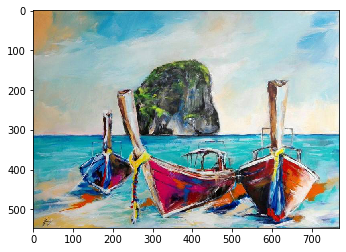

In [136]:
#dimensions
image_show(painting_paths[0])
img1 = image_reader(painting_paths[0])
print('Dimensions are', np.shape(img1))

Text(0.5, 0, 'Pixel value')

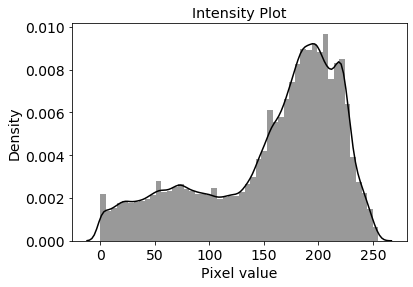

In [173]:
#Image intenesity. Would appear this image is bright (towards 255)

import seaborn as sns
sns.distplot(img1.flatten(), color='k')
plt.rc('font', size=12)
#flatten pixels so they are one array
plt.title('Intensity Plot')
plt.ylabel('Density')
plt.xlabel('Pixel value')
#0 pixel values are blacks, 255 pixel values are whites.

Text(0.5, 1.0, 'Blues on the Image')

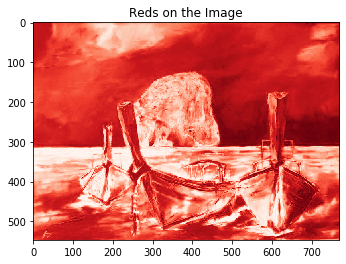

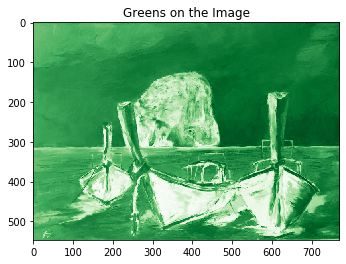

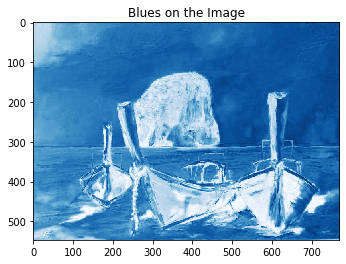

In [138]:
Red, Green, Blue = Image.Image.split(Image.fromarray(img1, 'RGB'))
plt.figure()
plt.imshow(Red, cmap='Reds')
plt.title('Reds on the Image')

plt.figure()
plt.imshow(Green,cmap='Greens')
plt.title('Greens on the Image')

plt.figure()
plt.imshow(Blue,cmap='Blues')
plt.title('Blues on the Image')

In [139]:
#image storage
from skimage import io
ic = io.ImageCollection(r'C:\Users\sh9wn\Desktop\Style Transfer Project\ST_pics\*.*')
ic.files


['C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\0.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\1.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\2.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\3.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\4.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\5.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\6.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\7.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\8.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\9.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\Deer_by_the_Lake_Landscape_Painting_550x.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\abstract.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Style Transfer Project\\ST_pics\\chalermchai1.jpg',
 'C:\\Users\\sh9wn\\Desktop\\Styl

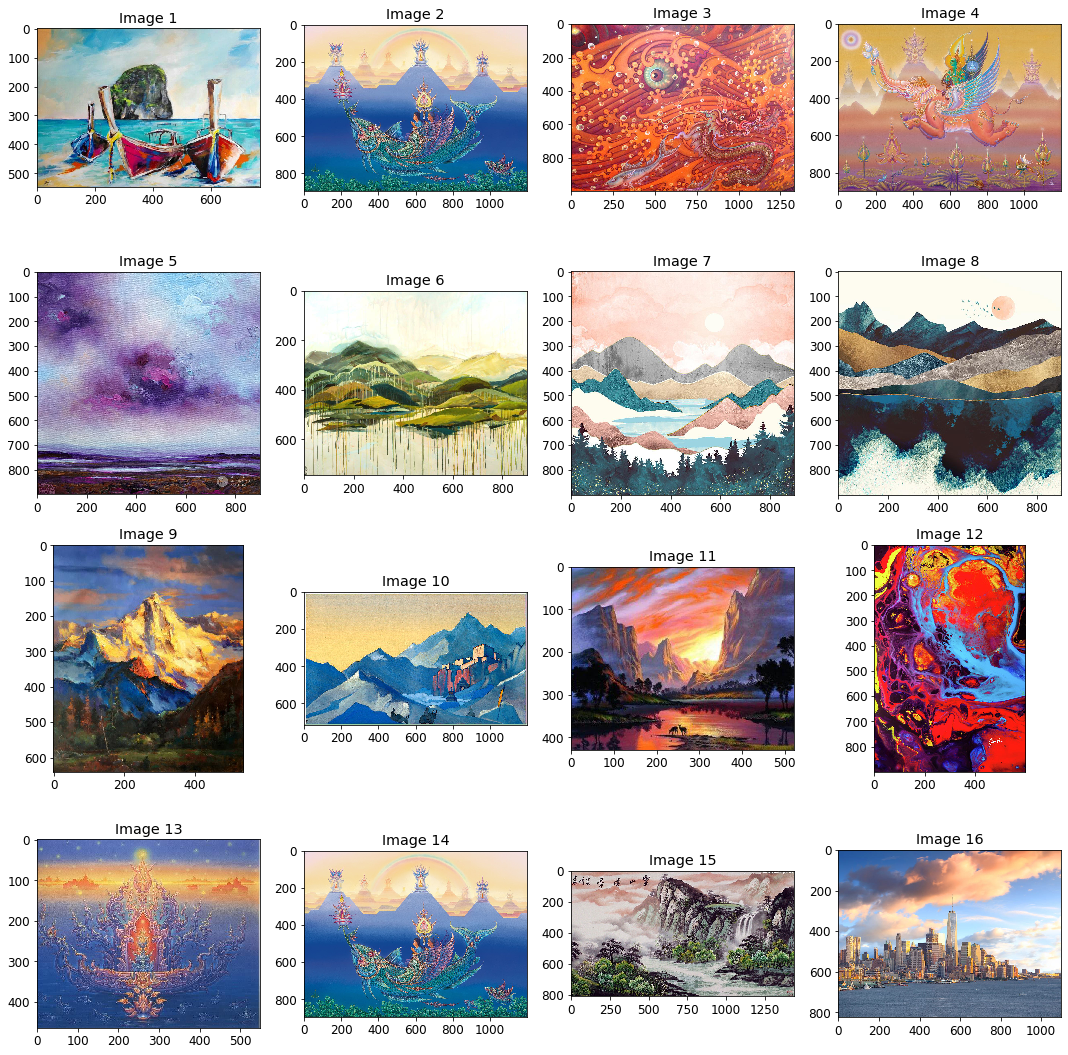

In [176]:
x, axes= plt.subplots(nrows= 4, ncols=4, figsize=(15,15))

axes= axes.ravel()
#plotting all images in my directory

for i, image in enumerate(ic):
    axes[i].title.set_text('Image {}'.format(i+1))
    axes[i].imshow(image)
    x.tight_layout()

In [141]:
pic_list= []
for image in ic:
    pic_list.append(image.flatten())

In [142]:
import pandas as pd
df= pd.Series(pic_list)
img_df= df.to_frame()
img_df.head()

,0
0,"[192, 131, 68, 193, 132, 69, 193, 132, 69, 194..."
1,"[184, 158, 171, 207, 181, 194, 242, 216, 229, ..."
2,"[235, 134, 46, 241, 135, 57, 236, 127, 62, 227..."
3,"[212, 167, 74, 211, 166, 73, 211, 166, 73, 211..."
4,"[139, 110, 177, 98, 69, 136, 84, 55, 122, 101,..."


In [143]:
img_df.rename(columns={0:'Pixel_array'}, inplace=True)
#Renamed only column

In [144]:
#aggregates list into 3 lists within a list for (RGB), then the index is taken to get R,G or B
def lst_slicer(lst,pixel_loc):
    return [lst[i::3] for i in range(3)][pixel_loc]

#test to return every 3rd pixel (reds)
test_l= [1,2,3,4,5,6,7,8,9]
lst_slicer(test_l,0)

[1, 4, 7]

In [145]:
#Red, Green, Blue Pixel val columns created
img_df['Reds'] = img_df.Pixel_array.apply(lambda x: lst_slicer(x,0))
img_df['Greens'] = img_df.Pixel_array.apply(lambda x:lst_slicer(x,1))
img_df['Blues'] = img_df.Pixel_array.apply(lambda x:lst_slicer(x,2))
img_df.head()

,Pixel_array,Reds,Greens,Blues
0,"[192, 131, 68, 193, 132, 69, 193, 132, 69, 194...","[192, 193, 193, 194, 195, 197, 198, 199, 200, ...","[131, 132, 132, 133, 134, 136, 137, 138, 139, ...","[68, 69, 69, 70, 71, 73, 74, 75, 76, 77, 78, 8..."
1,"[184, 158, 171, 207, 181, 194, 242, 216, 229, ...","[184, 207, 242, 243, 241, 245, 238, 242, 240, ...","[158, 181, 216, 217, 215, 221, 214, 218, 218, ...","[171, 194, 229, 230, 228, 234, 227, 231, 230, ..."
2,"[235, 134, 46, 241, 135, 57, 236, 127, 62, 227...","[235, 241, 236, 227, 228, 236, 236, 227, 237, ...","[134, 135, 127, 111, 104, 107, 102, 93, 102, 1...","[46, 57, 62, 60, 66, 76, 73, 56, 55, 62, 69, 6..."
3,"[212, 167, 74, 211, 166, 73, 211, 166, 73, 211...","[212, 211, 211, 211, 211, 211, 211, 212, 208, ...","[167, 166, 166, 166, 166, 166, 166, 167, 163, ...","[74, 73, 73, 73, 73, 73, 73, 74, 70, 69, 70, 7..."
4,"[139, 110, 177, 98, 69, 136, 84, 55, 122, 101,...","[139, 98, 84, 101, 106, 104, 116, 131, 132, 12...","[110, 69, 55, 72, 77, 75, 87, 102, 103, 91, 74...","[177, 136, 122, 139, 144, 142, 154, 169, 170, ..."


In [146]:
#grabbing height and width of each image and making new columns
img_df['height']=pd.Series([image.shape[0] for image in ic])
img_df['width']=pd.Series([image.shape[1] for image in ic])
img_df.head()

,Pixel_array,Reds,Greens,Blues,height,width
0,"[192, 131, 68, 193, 132, 69, 193, 132, 69, 194...","[192, 193, 193, 194, 195, 197, 198, 199, 200, ...","[131, 132, 132, 133, 134, 136, 137, 138, 139, ...","[68, 69, 69, 70, 71, 73, 74, 75, 76, 77, 78, 8...",547,770
1,"[184, 158, 171, 207, 181, 194, 242, 216, 229, ...","[184, 207, 242, 243, 241, 245, 238, 242, 240, ...","[158, 181, 216, 217, 215, 221, 214, 218, 218, ...","[171, 194, 229, 230, 228, 234, 227, 231, 230, ...",894,1200
2,"[235, 134, 46, 241, 135, 57, 236, 127, 62, 227...","[235, 241, 236, 227, 228, 236, 236, 227, 237, ...","[134, 135, 127, 111, 104, 107, 102, 93, 102, 1...","[46, 57, 62, 60, 66, 76, 73, 56, 55, 62, 69, 6...",1000,1333
3,"[212, 167, 74, 211, 166, 73, 211, 166, 73, 211...","[212, 211, 211, 211, 211, 211, 211, 212, 208, ...","[167, 166, 166, 166, 166, 166, 166, 167, 163, ...","[74, 73, 73, 73, 73, 73, 73, 74, 70, 69, 70, 7...",902,1200
4,"[139, 110, 177, 98, 69, 136, 84, 55, 122, 101,...","[139, 98, 84, 101, 106, 104, 116, 131, 132, 12...","[110, 69, 55, 72, 77, 75, 87, 102, 103, 91, 74...","[177, 136, 122, 139, 144, 142, 154, 169, 170, ...",899,900


Text(0.5, 0, 'Pic Index')

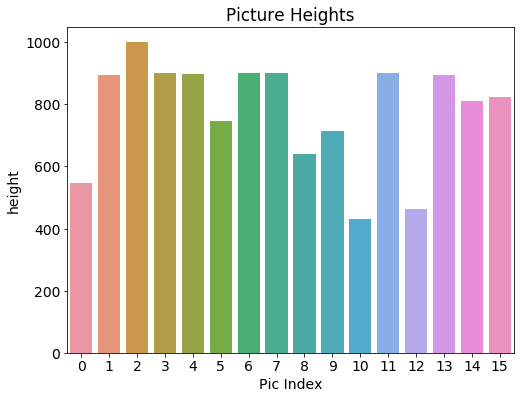

In [164]:
#barplot of all style image heights
plt.figure(figsize=(8,6))
plt.rc('font', size=14)
sns.barplot(x=img_df.index, y=img_df.height)
plt.title('Picture Heights')
plt.xlabel('Pic Index')

Text(0.5, 0, 'Pic Index')

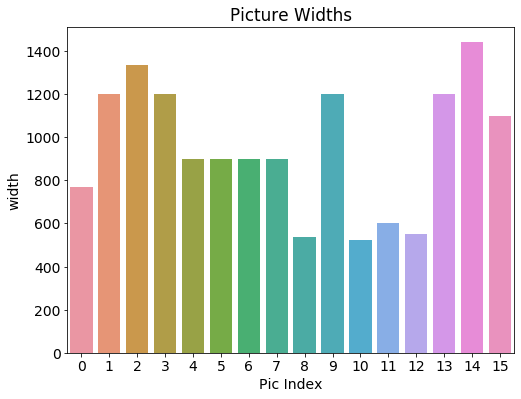

In [165]:
#barplot of all style image widths
plt.figure(figsize=(8,6))
sns.barplot(x=img_df.index, y=img_df.width)
plt.title('Picture Widths')
plt.xlabel('Pic Index')

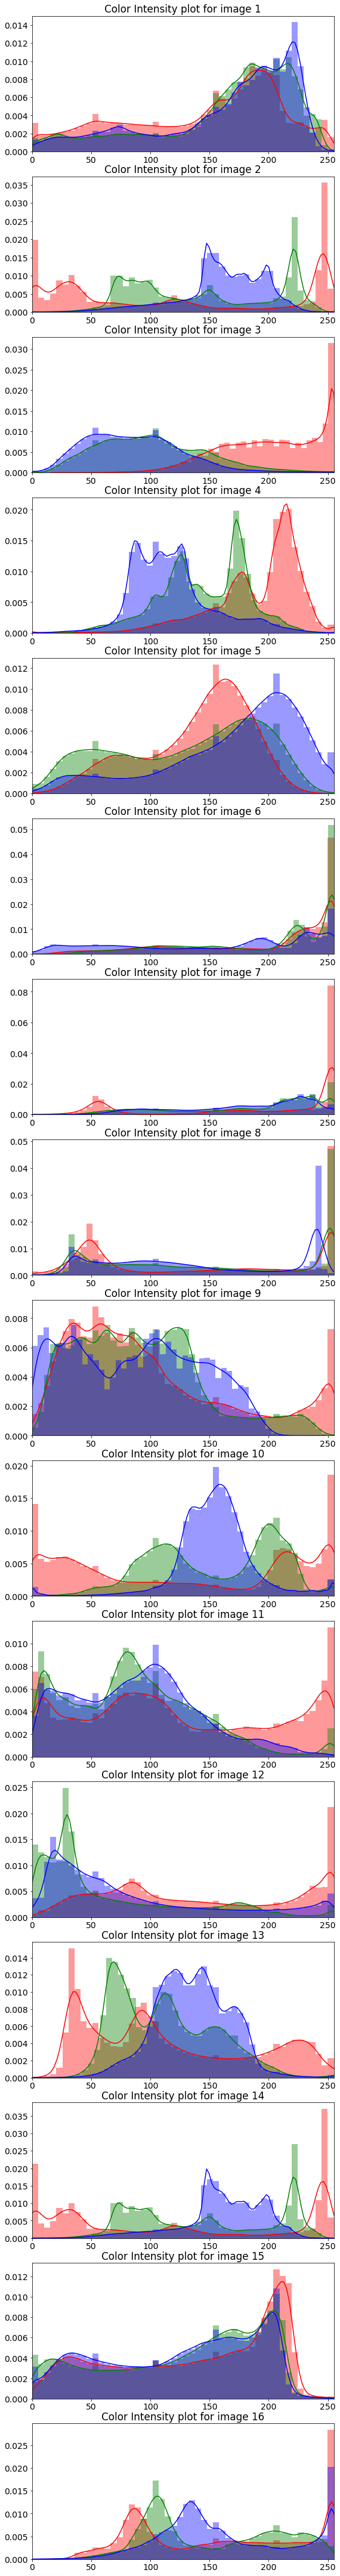

In [172]:
fig, axs = plt.subplots(nrows=16, figsize=(8,60))
#initialize subplots and figure size
plt.rc('font', size=14)
fig.tight_layout()
#iterate through each row and plot the rgb intensity of each image
for i in range(16):
    sns.distplot(img_df.Reds[i],color='r', ax=axs[i])
    sns.distplot(img_df.Greens[i], color='g', ax=axs[i])
    sns.distplot(img_df.Blues[i], color='b', ax=axs[i])
    axs[i].set_xlim(0,255)
    axs[i].title.set_text('Color Intensity plot for image {}'.format(i+1))


In [167]:
img_df['reds_shade'] = img_df.Reds.apply(lambda x: np.array(stats.mode(x)[0].astype(int)))
img_df['greens_shade'] = img_df.Greens.apply(lambda x: np.array(stats.mode(x)[0].astype(int)))
img_df['blues_shade'] = img_df.Blues.apply(lambda x: np.array(stats.mode(x)[0].astype(int)))
img_df
#finding 

,Pixel_array,Reds,Greens,Blues,height,width,reds_shade,greens_shade,blues_shade
0,"[192, 131, 68, 193, 132, 69, 193, 132, 69, 194...","[192, 193, 193, 194, 195, 197, 198, 199, 200, ...","[131, 132, 132, 133, 134, 136, 137, 138, 139, ...","[68, 69, 69, 70, 71, 73, 74, 75, 76, 77, 78, 8...",547,770,[185],[217],[221]
1,"[184, 158, 171, 207, 181, 194, 242, 216, 229, ...","[184, 207, 242, 243, 241, 245, 238, 242, 240, ...","[158, 181, 216, 217, 215, 221, 214, 218, 218, ...","[171, 194, 229, 230, 228, 234, 227, 231, 230, ...",894,1200,[246],[221],[147]
2,"[235, 134, 46, 241, 135, 57, 236, 127, 62, 227...","[235, 241, 236, 227, 228, 236, 236, 227, 237, ...","[134, 135, 127, 111, 104, 107, 102, 93, 102, 1...","[46, 57, 62, 60, 66, 76, 73, 56, 55, 62, 69, 6...",1000,1333,[255],[103],[65]
3,"[212, 167, 74, 211, 166, 73, 211, 166, 73, 211...","[212, 211, 211, 211, 211, 211, 211, 212, 208, ...","[167, 166, 166, 166, 166, 166, 166, 167, 163, ...","[74, 73, 73, 73, 73, 73, 73, 74, 70, 69, 70, 7...",902,1200,[215],[172],[87]
4,"[139, 110, 177, 98, 69, 136, 84, 55, 122, 101,...","[139, 98, 84, 101, 106, 104, 116, 131, 132, 12...","[110, 69, 55, 72, 77, 75, 87, 102, 103, 91, 74...","[177, 136, 122, 139, 144, 142, 154, 169, 170, ...",899,900,[163],[178],[255]
5,"[225, 235, 226, 225, 235, 226, 224, 234, 225, ...","[225, 225, 224, 223, 223, 221, 219, 218, 219, ...","[235, 235, 234, 235, 235, 234, 235, 236, 237, ...","[226, 226, 225, 225, 225, 224, 224, 224, 225, ...",746,900,[255],[255],[255]
6,"[219, 188, 159, 255, 195, 176, 241, 162, 149, ...","[219, 255, 241, 235, 209, 236, 250, 234, 238, ...","[188, 195, 162, 164, 147, 159, 156, 155, 198, ...","[159, 176, 149, 146, 126, 143, 146, 140, 172, ...",900,899,[255],[252],[239]
7,"[254, 252, 240, 254, 252, 240, 254, 252, 240, ...","[254, 254, 254, 254, 254, 254, 254, 254, 254, ...","[252, 252, 252, 252, 252, 252, 252, 252, 252, ...","[240, 240, 240, 240, 240, 240, 240, 240, 240, ...",900,899,[254],[252],[240]
8,"[47, 79, 136, 64, 96, 153, 82, 114, 171, 89, 1...","[47, 64, 82, 89, 89, 89, 89, 88, 82, 79, 77, 7...","[79, 96, 114, 121, 121, 121, 121, 120, 114, 11...","[136, 153, 171, 178, 178, 178, 178, 177, 171, ...",640,537,[255],[62],[0]
9,"[229, 251, 215, 243, 255, 244, 234, 243, 242, ...","[229, 243, 234, 254, 249, 251, 250, 251, 255, ...","[251, 255, 243, 255, 252, 252, 247, 244, 249, ...","[215, 244, 242, 248, 223, 218, 232, 252, 255, ...",715,1200,[255],[200],[160]


In [168]:
type(img_df.reds_shade[0])

numpy.ndarray

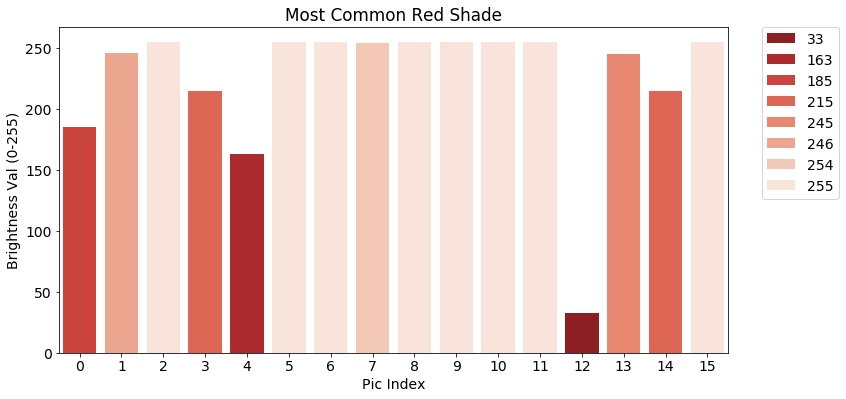

In [169]:
#barplot of all style image heights
plt.figure(figsize=(12,6))
sns.barplot(x=img_df.index, y=img_df.reds_shade.astype(int), palette='Reds_r', hue=img_df.reds_shade.astype(int), dodge=False)
#palette is used to sort from high to low brightness
plt.ylabel('Brightness Val (0-255)')
plt.title('Most Common Red Shade')
plt.xlabel('Pic Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#moves legend outside


#Most images have very bright reds
#image at index 12 has very dark shades of reds

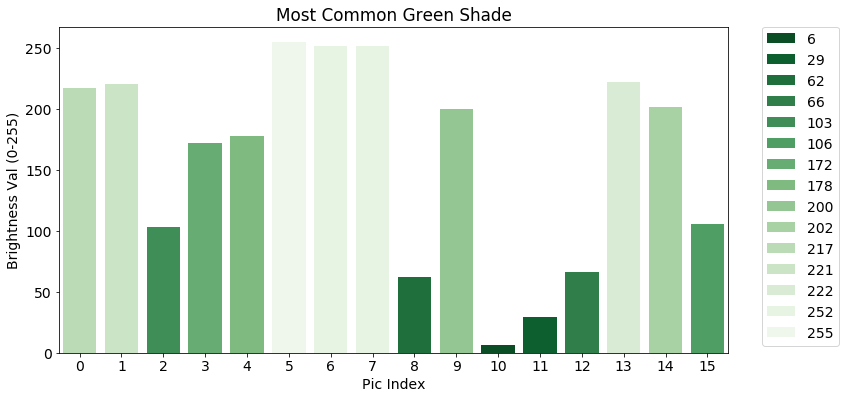

In [170]:
#barplot of all style image heights
plt.figure(figsize=(12,6))
sns.barplot(x=img_df.index, y=img_df.greens_shade.astype(int), palette='Greens_r', hue=img_df.greens_shade.astype(int),
            dodge=False)
#palette is used to sort from high to low brightness
plt.ylabel('Brightness Val (0-255)')
plt.title('Most Common Green Shade')
plt.xlabel('Pic Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#moves legend outside


#Images at index 5,6,7 have very bright greens
#Image at index 10 has a very dark shade of green

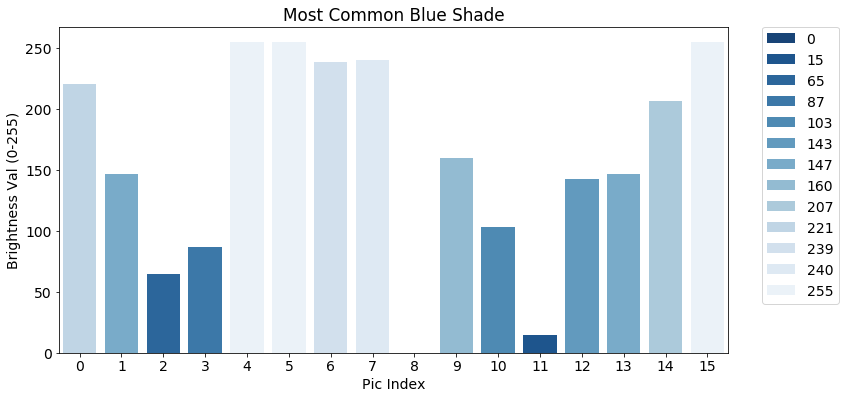

In [171]:
#barplot of all style image heights
plt.figure(figsize=(12,6))
sns.barplot(x=img_df.index, y=img_df.blues_shade.astype(int), palette='Blues_r', hue=img_df.blues_shade.astype(int),
            dodge=False)
#palette is used to sort from high to low brightness
plt.ylabel('Brightness Val (0-255)')
plt.title('Most Common Blue Shade')
plt.xlabel('Pic Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#moves legend outside

#image at index 8 has very dark blues
#image at index 4,5 and 15 have very bright blues

In [162]:
mean_red=img_df.reds_shade.mean()
mean_blue=img_df.blues_shade.mean()
mean_green=img_df.greens_shade.mean()
print('The average red shade is {}, the average blue shade is {}, the average green shade is {}.'
      .format(mean_red,mean_blue, mean_green))

The average red shade is [224.75], the average blue shade is [158.6875], the average green shade is [158.9375].


In [ ]:
#convert to numpy and put in dataframe
#width, height
#intensity plot of each color in each image
#cropping, scaling, mirror, rotating, transformations
